In [29]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 60.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
import geopandas as gpd

In [8]:
df_tp = pd.read_csv('/content/forecast_tp_banyumas.csv',parse_dates=['datetime'])
df_tp['datetime']

,datetime
0,2024-11-16 00:00:00+00:00
1,2024-11-17 00:00:00+00:00
2,2024-11-18 00:00:00+00:00
3,2024-11-19 00:00:00+00:00
4,2024-11-16 00:00:00+00:00
...,...
103,2024-11-19 00:00:00+00:00
104,2024-11-16 00:00:00+00:00
105,2024-11-17 00:00:00+00:00
106,2024-11-18 00:00:00+00:00


In [35]:
# Mengambil forecast D1
tp_d1 = df_tp.loc[df_tp['datetime'].dt.day==18]
tp_d1

,kecamatan,datetime,tp,adm3
2,Ajibarang,2024-11-18 00:00:00+00:00,35.1,33.02.14
6,Banyumas,2024-11-18 00:00:00+00:00,18.1,33.02.11
10,Baturraden,2024-11-18 00:00:00+00:00,44.2,33.02.22
14,Cilongok,2024-11-18 00:00:00+00:00,45.7,33.02.17
18,Gumelar,2024-11-18 00:00:00+00:00,22.0,33.02.15
22,Jatilawang,2024-11-18 00:00:00+00:00,19.6,33.02.03
26,Kalibagor,2024-11-18 00:00:00+00:00,16.1,33.02.10
30,Karanglewas,2024-11-18 00:00:00+00:00,45.7,33.02.18
34,Kebasen,2024-11-18 00:00:00+00:00,17.4,33.02.05
38,Kedungbanteng,2024-11-18 00:00:00+00:00,46.8,33.02.23


In [36]:
# standarisasi menjadi hazard, nilai max curah hujan 100 mm/hari
tp_d1['hz']=tp_d1['tp']/100
tp_d1

<ipython-input-36-d2ad37658189>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tp_d1['hz']=tp_d1['tp']/100


,kecamatan,datetime,tp,adm3,hz
2,Ajibarang,2024-11-18 00:00:00+00:00,35.1,33.02.14,0.351
6,Banyumas,2024-11-18 00:00:00+00:00,18.1,33.02.11,0.181
10,Baturraden,2024-11-18 00:00:00+00:00,44.2,33.02.22,0.442
14,Cilongok,2024-11-18 00:00:00+00:00,45.7,33.02.17,0.457
18,Gumelar,2024-11-18 00:00:00+00:00,22.0,33.02.15,0.220
22,Jatilawang,2024-11-18 00:00:00+00:00,19.6,33.02.03,0.196
26,Kalibagor,2024-11-18 00:00:00+00:00,16.1,33.02.10,0.161
30,Karanglewas,2024-11-18 00:00:00+00:00,45.7,33.02.18,0.457
34,Kebasen,2024-11-18 00:00:00+00:00,17.4,33.02.05,0.174
38,Kedungbanteng,2024-11-18 00:00:00+00:00,46.8,33.02.23,0.468


In [37]:
# Membuka file kerentanan dan exposure

gdf = gpd.read_file('/content/exp_vul_banyumas.geojson')
gdf

,kode,kecamatan,flood_vul,exp,geometry
0,33.02.01,Lumbir,0.423077,0.232459,"POLYGON Z ((109.01438 -7.52113 0, 109.01408 -7..."
1,33.02.02,Wangon,0.384615,0.418970,"POLYGON Z ((109.05825 -7.55648 0, 109.05818 -7..."
2,33.02.03,Jatilawang,0.038462,0.362084,"POLYGON Z ((109.12735 -7.57635 0, 109.12601 -7..."
3,33.02.04,Rawalo,0.423077,0.283669,"POLYGON Z ((109.16843 -7.56576 0, 109.16834 -7..."
4,33.02.05,Kebasen,0.423077,0.362110,"POLYGON Z ((109.21476 -7.56449 0, 109.21471 -7..."
5,33.02.06,Kemranjen,0.923077,0.371297,"POLYGON Z ((109.29156 -7.62489 0, 109.29106 -7..."
6,33.02.07,Sumpiuh,1.000000,0.296673,"POLYGON Z ((109.3661 -7.65454 0, 109.3659 -7.6..."
7,33.02.08,Tambak,0.923077,0.269098,"POLYGON Z ((109.4154 -7.6473 0, 109.4154 -7.64..."
8,33.02.09,Somagede,0.038462,0.210309,"POLYGON Z ((109.33031 -7.55396 0, 109.32911 -7..."
9,33.02.10,Kalibagor,0.269231,0.331365,"POLYGON Z ((109.31125 -7.51256 0, 109.30946 -7..."


In [38]:
# merge dengan tp
gdf_merge = gdf.merge(tp_d1[['adm3','hz']], left_on='kode',right_on='adm3',how='left')
gdf_merge = gdf_merge.drop(columns=['adm3'])
gdf_merge = gdf_merge[['kode','kecamatan','flood_vul','exp','hz','geometry']]
gdf_merge

,kode,kecamatan,flood_vul,exp,hz,geometry
0,33.02.01,Lumbir,0.423077,0.232459,0.263,"POLYGON Z ((109.01438 -7.52113 0, 109.01408 -7..."
1,33.02.02,Wangon,0.384615,0.418970,0.248,"POLYGON Z ((109.05825 -7.55648 0, 109.05818 -7..."
2,33.02.03,Jatilawang,0.038462,0.362084,0.196,"POLYGON Z ((109.12735 -7.57635 0, 109.12601 -7..."
3,33.02.04,Rawalo,0.423077,0.283669,0.195,"POLYGON Z ((109.16843 -7.56576 0, 109.16834 -7..."
4,33.02.05,Kebasen,0.423077,0.362110,0.174,"POLYGON Z ((109.21476 -7.56449 0, 109.21471 -7..."
5,33.02.06,Kemranjen,0.923077,0.371297,0.218,"POLYGON Z ((109.29156 -7.62489 0, 109.29106 -7..."
6,33.02.07,Sumpiuh,1.000000,0.296673,0.241,"POLYGON Z ((109.3661 -7.65454 0, 109.3659 -7.6..."
7,33.02.08,Tambak,0.923077,0.269098,0.249,"POLYGON Z ((109.4154 -7.6473 0, 109.4154 -7.64..."
8,33.02.09,Somagede,0.038462,0.210309,0.211,"POLYGON Z ((109.33031 -7.55396 0, 109.32911 -7..."
9,33.02.10,Kalibagor,0.269231,0.331365,0.161,"POLYGON Z ((109.31125 -7.51256 0, 109.30946 -7..."


In [44]:
# menghitung risk = h . v . e

gdf_merge['risk'] = 1*gdf_merge['flood_vul']
gdf_merge

,kode,kecamatan,flood_vul,exp,hz,geometry,risk,color
0,33.02.01,Lumbir,0.423077,0.232459,0.263,"POLYGON Z ((109.01438 -7.52113 0, 109.01408 -7...",0.423077,#00FF00
1,33.02.02,Wangon,0.384615,0.418970,0.248,"POLYGON Z ((109.05825 -7.55648 0, 109.05818 -7...",0.384615,#00FF00
2,33.02.03,Jatilawang,0.038462,0.362084,0.196,"POLYGON Z ((109.12735 -7.57635 0, 109.12601 -7...",0.038462,#00FF00
3,33.02.04,Rawalo,0.423077,0.283669,0.195,"POLYGON Z ((109.16843 -7.56576 0, 109.16834 -7...",0.423077,#00FF00
4,33.02.05,Kebasen,0.423077,0.362110,0.174,"POLYGON Z ((109.21476 -7.56449 0, 109.21471 -7...",0.423077,#00FF00
5,33.02.06,Kemranjen,0.923077,0.371297,0.218,"POLYGON Z ((109.29156 -7.62489 0, 109.29106 -7...",0.923077,#00FF00
6,33.02.07,Sumpiuh,1.000000,0.296673,0.241,"POLYGON Z ((109.3661 -7.65454 0, 109.3659 -7.6...",1.000000,#00FF00
7,33.02.08,Tambak,0.923077,0.269098,0.249,"POLYGON Z ((109.4154 -7.6473 0, 109.4154 -7.64...",0.923077,#00FF00
8,33.02.09,Somagede,0.038462,0.210309,0.211,"POLYGON Z ((109.33031 -7.55396 0, 109.32911 -7...",0.038462,#00FF00
9,33.02.10,Kalibagor,0.269231,0.331365,0.161,"POLYGON Z ((109.31125 -7.51256 0, 109.30946 -7...",0.269231,#00FF00


In [45]:
def assign_color(std):
    if 0 <= std < 0.25:
        return "#00FF00"  # Green
    elif 0.25 <= std < 0.5:
        return "#FFFF00"  # Yellow
    elif 0.5 <= std < 0.85:
        return "#FFA500"  # Amber
    elif 0.85 <= std <= 1:
        return "#FF0000"  # Red
    else:
        return "#FFFFFF"  # Default (white) for out-of-range values

In [46]:
gdf_merge['color'] = gdf_merge['risk'].apply(assign_color)
gdf_merge

,kode,kecamatan,flood_vul,exp,hz,geometry,risk,color
0,33.02.01,Lumbir,0.423077,0.232459,0.263,"POLYGON Z ((109.01438 -7.52113 0, 109.01408 -7...",0.423077,#FFFF00
1,33.02.02,Wangon,0.384615,0.418970,0.248,"POLYGON Z ((109.05825 -7.55648 0, 109.05818 -7...",0.384615,#FFFF00
2,33.02.03,Jatilawang,0.038462,0.362084,0.196,"POLYGON Z ((109.12735 -7.57635 0, 109.12601 -7...",0.038462,#00FF00
3,33.02.04,Rawalo,0.423077,0.283669,0.195,"POLYGON Z ((109.16843 -7.56576 0, 109.16834 -7...",0.423077,#FFFF00
4,33.02.05,Kebasen,0.423077,0.362110,0.174,"POLYGON Z ((109.21476 -7.56449 0, 109.21471 -7...",0.423077,#FFFF00
5,33.02.06,Kemranjen,0.923077,0.371297,0.218,"POLYGON Z ((109.29156 -7.62489 0, 109.29106 -7...",0.923077,#FF0000
6,33.02.07,Sumpiuh,1.000000,0.296673,0.241,"POLYGON Z ((109.3661 -7.65454 0, 109.3659 -7.6...",1.000000,#FF0000
7,33.02.08,Tambak,0.923077,0.269098,0.249,"POLYGON Z ((109.4154 -7.6473 0, 109.4154 -7.64...",0.923077,#FF0000
8,33.02.09,Somagede,0.038462,0.210309,0.211,"POLYGON Z ((109.33031 -7.55396 0, 109.32911 -7...",0.038462,#00FF00
9,33.02.10,Kalibagor,0.269231,0.331365,0.161,"POLYGON Z ((109.31125 -7.51256 0, 109.30946 -7...",0.269231,#FFFF00


In [47]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

<ipython-input-48-b5cc8234d523>:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf_merge.plot(ax=ax, column='risk', color=gdf_merge['color'], edgecolor='black', linewidth=0.5)


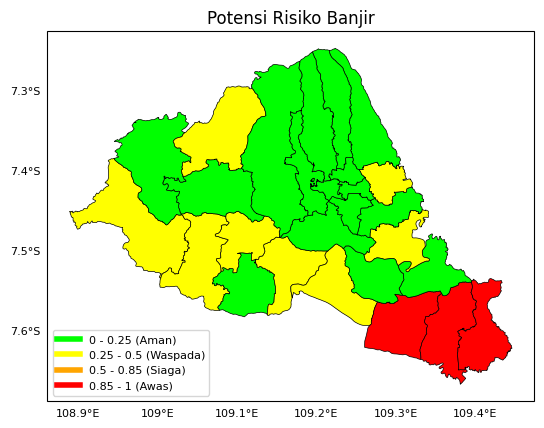

In [48]:
# Plot using the custom colors
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
gdf_merge.plot(ax=ax, column='risk', color=gdf_merge['color'], edgecolor='black', linewidth=0.5)

ax.set_title('Potensi Risiko Banjir')

# Configure gridlines for labels only on the left and bottom, with no visible gridlines
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
gl.right_labels = False  # Disable right labels
gl.top_labels = False    # Disable top labels
gl.left_labels = True    # Enable left labels
gl.bottom_labels = True  # Enable bottom labels
gl.xlabel_style = {'size': 8}  # Font size for x-axis labels
gl.ylabel_style = {'size': 8}  # Font size for y-axis labels
gl.xlines = False  # Disable x gridlines
gl.ylines = False  # Disable y gridlines

# Add a custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color="#00FF00", lw=4, label='0 - 0.25 (Aman)'),
    Line2D([0], [0], color="#FFFF00", lw=4, label='0.25 - 0.5 (Waspada)'),
    Line2D([0], [0], color="#FFA500", lw=4, label='0.5 - 0.85 (Siaga)'),
    Line2D([0], [0], color="#FF0000", lw=4, label='0.85 - 1 (Awas)')
]
ax.legend(handles=legend_elements, loc='lower left', fontsize=8)
